In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the cleaned data
combined_schedule = pd.read_csv('combined_schedule.csv')

1. Predict what courses would be offered for next 4 years for each semester using: 
   - semester, 
   - year, 
   - course #
   - (some courses are offered every year and some are offered once two years or once 4 years or it could also be like a one year thing.)
    
1. make a csv file for the predicted course offerings for each year with semester like FA24, SP24, FA25, SP25....
    csv file includes:
    -  course #, 
    -  course title,  
    -  credits,
    -  likelihood of the course being offered in that semester and year as a percentage. 

### Create a dictionary with course offering years

In [38]:
import pandas as pd

# Load the cleaned data
combined_schedule = pd.read_csv('combined_schedule.csv')

# Remove spaces from the Course # column
combined_schedule['Course #'] = combined_schedule['Course #'].str.replace(' ', '')

# Convert Course # to upper case
combined_schedule['Course #'] = combined_schedule['Course #'].str.upper()

# Remove any \n characters
combined_schedule['Course #'] = combined_schedule['Course #'].str.replace('\n', '')

# Replace _and_, _, or, OR with /
combined_schedule['Course #'] = combined_schedule['Course #'].str.replace(r'(_AND_|_,_|_or_|_OR_)', '/')

# Order the data by Course #
combined_schedule_sorted = combined_schedule.sort_values(by='Course #')

# Create a list of unique offering years with semesters for each unique Course #
offering_years = {}
course_titles = {}

for course_number, group in combined_schedule_sorted.groupby('Course #'):
    # Create a set of unique offering years with semesters and sort them
    offering_years[course_number] = sorted(set(group.apply(lambda x: f"{x['Year']}{x['Semester']}", axis=1)))
    course_titles[course_number] = group.iloc[0]['Course Title']

# Display the dictionaries
print("Offering Years Dictionary:")
print(offering_years)
print("\nCourse Titles Dictionary:")
print(course_titles)

Offering Years Dictionary:
{'AHSE0112': ['2014FA', '2014SP', '2015FA', '2015SP', '2016FA', '2016SP', '2017FA', '2017SP', '2018FA', '2018SP', '2019FA', '2019SP', '2020FA', '2020SP', '2021FA', '2021SP', '2022FA', '2022SP', '2023FA', '2023SP'], 'AHSE1100': ['2014FA', '2015FA', '2016FA', '2017FA', '2018FA', '2019FA', '2020FA', '2021FA', '2022FA'], 'AHSE1122': ['2014FA', '2015FA', '2016FA', '2017FA', '2018FA', '2019FA', '2021FA', '2022FA', '2023FA'], 'AHSE1135': ['2015FA', '2016FA', '2017FA', '2018FA', '2019FA'], 'AHSE1145': ['2014FA', '2015FA'], 'AHSE1148': ['2018FA', '2019FA'], 'AHSE1150': ['2018FA'], 'AHSE1155': ['2014FA', '2016FA', '2017FA', '2020FA', '2021FA', '2022FA', '2023FA'], 'AHSE1160': ['2021FA', '2022FA', '2023FA'], 'AHSE1170': ['2022FA'], 'AHSE1199': ['2014FA', '2015FA', '2016FA', '2017FA', '2018FA', '2019FA', '2020FA', '2021FA', '2023FA'], 'AHSE1199A': ['2023FA'], 'AHSE1500': ['2014SP'], 'AHSE1515': ['2014FA', '2015FA', '2015SP', '2016SP', '2017SP', '2018SP', '2019SP', '2020S

Make dataframe with course offering availability for each semester (0 and 1)

In [39]:
# Get all unique semesters
semesters = ['2014FA', '2014SP','2015FA', '2015SP','2016FA', '2016SP',
             '2017FA', '2017SP','2018FA', '2018SP','2019FA', '2019SP',
             '2020FA', '2020SP','2021FA', '2021SP','2022FA', '2022SP',
             '2023FA', '2023SP', ]

# Initialize DataFrame
course_offering = pd.DataFrame(columns=semesters)

# Iterate over each course and update DataFrame
for course, offerings in offering_years.items():
    row_data = {semester: 1 if semester in offerings else 0 for semester in semesters}
    course_offering.loc[course] = row_data

# Fill missing values with 0
course_offering = course_offering.fillna(0)

# Print DataFrame
print(course_offering.head(10))

          2014FA  2014SP  2015FA  2015SP  2016FA  2016SP  2017FA  2017SP  \
AHSE0112       1       1       1       1       1       1       1       1   
AHSE1100       1       0       1       0       1       0       1       0   
AHSE1122       1       0       1       0       1       0       1       0   
AHSE1135       0       0       1       0       1       0       1       0   
AHSE1145       1       0       1       0       0       0       0       0   
AHSE1148       0       0       0       0       0       0       0       0   
AHSE1150       0       0       0       0       0       0       0       0   
AHSE1155       1       0       0       0       1       0       1       0   
AHSE1160       0       0       0       0       0       0       0       0   
AHSE1170       0       0       0       0       0       0       0       0   

          2018FA  2018SP  2019FA  2019SP  2020FA  2020SP  2021FA  2021SP  \
AHSE0112       1       1       1       1       1       1       1       1   
AHSE1100   

In [40]:
course_offering.size

5240

### Split test and train data


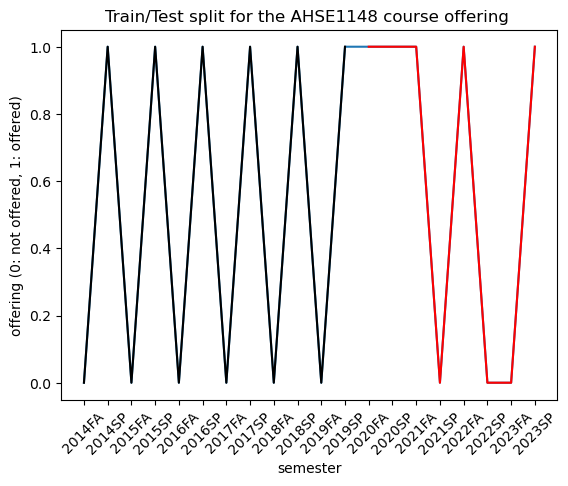

In [41]:
import matplotlib.pyplot as plt
prediction_course_number = 'ENGR2320'

# course_offering.T['AHSE0112']
plt.plot(course_offering.T[prediction_course_number])
train = course_offering.drop(columns=['2020FA', '2020SP','2021FA', '2021SP','2022FA', '2022SP','2023FA', '2023SP'])
train.head(10)
test = course_offering[['2020FA', '2020SP','2021FA', '2021SP','2022FA', '2022SP','2023FA', '2023SP']]
test.head(10)

plt.plot(train.T[prediction_course_number], color = 'black')
plt.plot(test.T[prediction_course_number], color = 'red')
plt.ylabel('offering (0: not offered, 1: offered)')
plt.xlabel('semester')
plt.xticks(rotation=45)
plt.title('Train/Test split for the AHSE1148 course offering ')
plt.show()

In [42]:
a=0
for prediction_course_number in course_offering.index:
    a+=1
a

262

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# prediction_course_number = 'AHSE1515'
prediction = {}
for prediction_course_number in course_offering.index:
       y = train.T[prediction_course_number]
       # define model
       ARMAmodel = SARIMAX(y, order = (1,1,2))
       # fit model
       ARMAmodel = ARMAmodel.fit()
       prediction_semesters = ['2020FA', '2020SP', '2021FA', '2021SP', '2022FA', '2022SP', '2023FA',
              '2023SP', '2024FA', '2024SP', '2025FA', '2025SP', '2026FA', '2026SP', '2027FA',
              '2027SP',]
       prediction_semesters = pd.DataFrame(prediction_semesters)
       print(prediction_semesters.index)
       # generate predictions
       y_pred = ARMAmodel.get_forecast(16)
       y_pred_df = y_pred.conf_int(alpha = 0.05) 
       y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
       y_pred_df.index = range(12, 28)
       y_pred_out = y_pred_df["Predictions"] 

       prediction[prediction_course_number] = y_pred_out


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99197D-01

At iterate   10    f= -1.26033D+00    |proj g|=  1.11916D+01

At iterate   15    f= -2.66476D+00    |proj g|=  5.45750D+01

At iterate   20    f= -3.56509D+00    |proj g|=  2.59392D+01
  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeInde


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Futu


At iterate    5    f=  6.60535D-01    |proj g|=  1.68862D-01

At iterate   10    f=  6.17364D-01    |proj g|=  4.61794D-02

At iterate   15    f=  6.03472D-01    |proj g|=  1.13006D-02

At iterate   20    f=  6.01939D-01    |proj g|=  1.26335D-02

At iterate   25    f=  6.01609D-01    |proj g|=  3.74714D-04

At iterate   30    f=  6.01472D-01    |proj g|=  3.20098D-02

At iterate   35    f=  6.01311D-01    |proj g|=  3.93038D-03

At iterate   40    f=  6.01279D-01    |proj g|=  1.17357D-03

At iterate   45    f=  6.01279D-01    |proj g|=  9.81208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     77   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39984D-01    |proj g|=  5.43684D-01

At iterate    5    f=  4.35427D-01    |proj g|=  9.36545D-02

At iterate   10    f=  4.20844D-01    |proj g|=  3.14420D-02

At iterate   15    f=  4.19901D-01    |proj g|=  7.20993D-03

At iterate   20    f=  4.19680D-01    |proj g|=  9.14451D-03

At iterate   25    f=  4.19638D-01    |proj g|=  6.10782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   25    f=  3.96324D-01    |proj g|=  5.80892D-01

At iterate   30    f=  3.02761D-01    |proj g|=  5.23755D-01

At iterate   35    f=  2.66767D-01    |proj g|=  2.38939D-02

At iterate   40    f=  2.65451D-01    |proj g|=  1.41435D-02

At iterate   45    f=  2.65324D-01    |proj g|=  3.96377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76      1     0     0   6.335D-04   2.653D-01
  F =  0.26531494634282154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate    5    f=  9.17114D+02    |proj g|=  2.18942D+05

At iterate   10    f=  1.23241D+02    |proj g|=  1.10462D+04

At iterate   15    f=  1.55666D+01    |proj g|=  5.49496D+02

At iterate   20    f=  1.68237D+00    |proj g|=  2.57379D+01

At iterate   25    f=  3.96324D-01    |proj g|=  5.80892D-01

At iterate   30    f=  3.02761D-01    |proj g|=  5.23755D-01

At iterate   35    f=  2.66767D-01    |proj g|=  2.38939D-02

At iterate   40    f=  2.65451D-01    |proj g|=  1.41435D-02

At iterate   45    f=  2.65324D-01    |proj g|=  3.96377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate    5    f=  9.17114D+02    |proj g|=  2.18942D+05

At iterate   10    f=  1.23241D+02    |proj g|=  1.10462D+04

At iterate   15    f=  1.55666D+01    |proj g|=  5.49496D+02

At iterate   20    f=  1.68237D+00    |proj g|=  2.57379D+01

At iterate   25    f=  3.96324D-01    |proj g|=  5.80892D-01

At iterate   30    f=  3.02761D-01    |proj g|=  5.23755D-01

At iterate   35    f=  2.66767D-01    |proj g|=  2.38939D-02

At iterate   40    f=  2.65451D-01    |proj g|=  1.41435D-02

At iterate   45    f=  2.65324D-01    |proj g|=  3.96377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     18      1     0     0   2.976D+02   1.578D+01
  F =   15.776249723140026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27073D-01    |proj g|=  1.15473D+00

At iterate    5    f=  2.58490D-01    |proj g|=  2.34388D-02

At iterate   10    f=  2.58161D-01    |proj g|=  5.52398D-03

At iterate   15    f=  2.57999D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will r

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     20      1     0     0   8.944D+04   5.477D+02
  F =   547.65136077357545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate    5    f= -1.75949D-01    |proj g|=  7.99197D-01

At iterate   10    f= -1.26033D+00    |proj g|=  1.11916D+01

At iterate   15    f= -2.66476D+00    |proj g|=  5.45750D+01

At iterate   20    f= -3.56509D+00    |proj g|=  2.59392D+01
  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B COD


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a m


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33333D+09    |proj g|=  1.83213D+14

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate    5    f=  3.54242D-01    |proj g|=  1.21243D+00

At iterate   10    f=  2.59402D-01    |proj g|=  2.93843D-02

At iterate   15    f=  2.58334D-01    |proj g|=  5.32985D-02

At iterate   20    f=  2.57988D-01    |proj g|=  1.64348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     76      2     0     0   4.515D-05   2.580D-01
  F =  0.25798836501469558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99204D-01

At iterate   10    f= -1.26012D+00    |proj g|=  1.11896D+01

At iterate   15    f= -2.69827D+00    |proj g|=  1.60848D+01

At iterate   20    f= -3.47135D+00    |proj g|=  7.54706D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00  -3.471D+00
  F =  -3.4714931443530994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00  -3.471D+00
  F =  -3.4714931443530994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75000D+09    |proj g|=  1.26454D+14
  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99204D-01

At iterate   10    f= -1.26012D+00    |proj g|=  1.11896D+01

At iterate   15    f= -2.69827D+00    |proj g|=  1.60848D+01

At iterate   20    f= -3.47135D+00    |proj g|=  7.54706D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this met


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00  -3.471D+00
  F =  -3.4714931443530994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23090D+00    |proj g|=  9.69506D-01

At iterate    5    f=  7.63887D-01    |proj g|=  1.14223D-01

At iterate   10    f=  7.23614D-01    |proj g|=  3.26760D-02

At iterate   15    f=  7.21559D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/


At iterate   25    f=  5.56308D-01    |proj g|=  9.09047D-03

At iterate   30    f=  5.56212D-01    |proj g|=  7.84628D-03

At iterate   35    f=  5.56191D-01    |proj g|=  7.83823D-03

At iterate   40    f=  5.56187D-01    |proj g|=  3.95498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     81      2     0     0   8.527D-05   5.562D-01
  F =  0.55618655434012521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/hom


At iterate    5    f=  2.77650D-01    |proj g|=  3.01264D-01

At iterate   10    f=  2.65693D-01    |proj g|=  9.71344D-03

At iterate   15    f=  2.65233D-01    |proj g|=  6.43489D-03

At iterate   20    f=  2.65220D-01    |proj g|=  1.06407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   5.989D-06   2.652D-01
  F =  0.26522047297811430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Futu


At iterate   45    f=  5.18963D-01    |proj g|=  3.03171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     70      1     0     0   3.060D-04   5.190D-01
  F =  0.51896281857156001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06398D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.40660D-01    |proj g|=  1.26201D-02

At iterate   10    f=  2.40213D-


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75000D+09    |proj g|=  1.26454D+14
  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99204D-01

At iterate   10    f= -1.26012D+00    |proj g|=  1.11896D+01

At iterate   15    f= -2.69827D+00    |proj g|=  1.60848D+01

At iterate   20    f= -3.47135D+00    |proj g|=  7.54706D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   20    f= -3.56509D+00    |proj g|=  2.59392D+01
  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |pro

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     20      1     0     0   1.342D+05   8.231D+02
  F =   823.07181478374389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  4.95829D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     73      1     0     0   2.860D-05   5.967D-01
  F =  0.59666645367543913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71681D+00    |proj g|=  8.45452D+01

At iterate    5    f=  8.34592D-01    |proj g|=  4.92889D-01

At iterate   10    f=  7.51315D-01    |proj g|=  1.37552D-02

At iterate   15    f=  7.47758D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38830D-01    |proj g|=  2.50004D-01

At iterate    5    f=  6.87977D-01    |proj g|=  1.35817D-01

At iterate   10    f=  6.73110D-01    |proj g|=  4.68808D-03

At iterate   15    f=  6.72520D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  4.95829D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   4.958D+13  -8.828D+00
  F =  -8.8283224431379637     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06398D-01    |proj g|=  1.15470D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


At iterate    5    f=  2.40660D-01    |proj g|=  1.26201D-02

At iterate   10    f=  2.40213D-01    |proj g|=  3.23187D-03

At iterate   15    f=  2.39955D-01    |proj g|=  1.17794D-02

At iterate   20    f=  2.39857D-01    |proj g|=  1.79561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     34      1     0     0   1.191D-04   2.399D-01
  F =  0.23985675429672523     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91667D+09    |proj g|=  8.06508D+13

At iterate    5    f=  6.33403D-01    |proj g|=  2.35246D-01

At iterate   10    f=  4.86155D-01    |proj g|=  1.64936D-01

At iterate   15    f=  4.19798D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06398D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.40660D-01    |proj g|=  1.26201D-02

At iterate   10    f=  2.40213D-01    |proj g|=  3.23187D-03

At iterate   15    f=  2.39955D-

 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63830D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.01658D-01    |proj g|=  8.89205D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99197D-01

At iterate   10    f= -1.26033D+00    |proj g|=  1.11916D+01

At iterate   15    f= -2.66476D+00    |proj g|=  5.45750D+01

At iterate   20    f= -3.56509D+00    |proj g|=  2.59392D+01
  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeInde


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     20      1     0     0   8.944D+04   5.477D+02
  F =   547.65099127367387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38182D-01    |proj g|=  9.14140D-01

At iterate    5    f=  2.77650D-01    |proj g|=  3.01264D-01

At iterate   10    f=  2.65693D-01    |proj g|=  9.71344D-03

At iterate   15    f=  2.65233D-

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/hom

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93388D+00    |proj g|=  1.80442D+01

At iterate    5    f=  7.35086D-01    |proj g|=  1.30644D-01

At iterate   10    f=  6.26964D-01    |proj g|=  5.06186D-02

At iterate   15    f=  5.92213D-01    |proj g|=  4.47224D-02

At iterate   20    f=  5.79558D-01    |proj g|=  1.81425D-02

At iterate   25    f=  5.77529D-01    |proj g|=  3.52354D-03

At iterate   30    f=  5.76934D-01    |proj g|=  1.34424D-03

At iterate   35    f=  5.76774D-01    |proj g|=  4.29128D-03

At iterate   40    f=  5.76730D-01    |proj g|=  5.84449D-03

At iterate   45    f=  5.76710D-01    |proj g|=  1.23562D-02

At iterate   50    f=  5.76701D-01    |proj g|=  1.09797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


At iterate    5    f=  3.54242D-01    |proj g|=  1.21243D+00

At iterate   10    f=  2.59402D-01    |proj g|=  2.93843D-02

At iterate   15    f=  2.58334D-01    |proj g|=  5.32985D-02

At iterate   20    f=  2.57988D-01    |proj g|=  1.64348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     76      2     0     0   4.515D-05   2.580D-01
  F =  0.25798836501469558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11

RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63830D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.01658D-01    |proj g|=  4.58319D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   10    f=  1.52899D+02    |proj g|=  1.33877D+04

At iterate   15    f=  1.96055D+01    |proj g|=  6.66676D+02

At iterate   20    f=  2.24145D+00    |proj g|=  3.14878D+01

At iterate   25    f=  5.18711D-01    |proj g|=  8.42105D-01

At iterate   30    f=  4.74785D-01    |proj g|=  3.90308D-02

At iterate   35    f=  4.62863D-01    |proj g|=  2.00047D-01

At iterate   40    f=  4.27242D-01    |proj g|=  7.77734D-02

At iterate   45    f=  4.25043D-01    |proj g|=  6.25717D-03

At iterate   50    f=  4.24719D-01    |proj g|=  2.67274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   30    f=  5.15166D-01    |proj g|=  9.18804D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     49      1     0     0   7.577D-05   5.152D-01
  F =  0.51516557776818361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     19      1     0     0   8.944D+04   5.477D+02
  F =   547.65185343718952     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     22      1     0     0   1.136D+02   5.592D+00
  F =   5.5923552265839618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  4.95829D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 

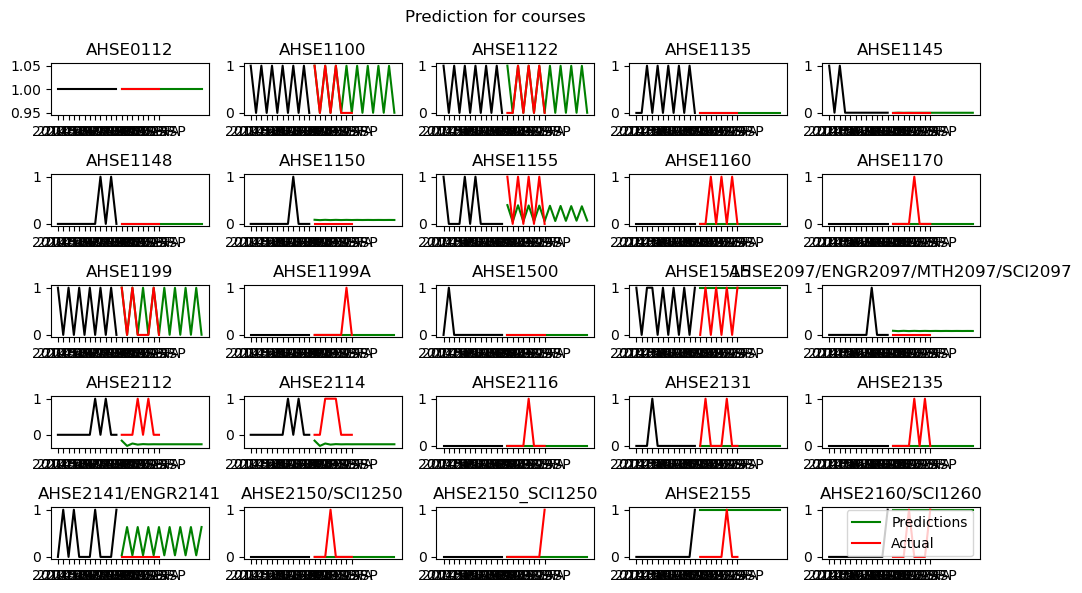

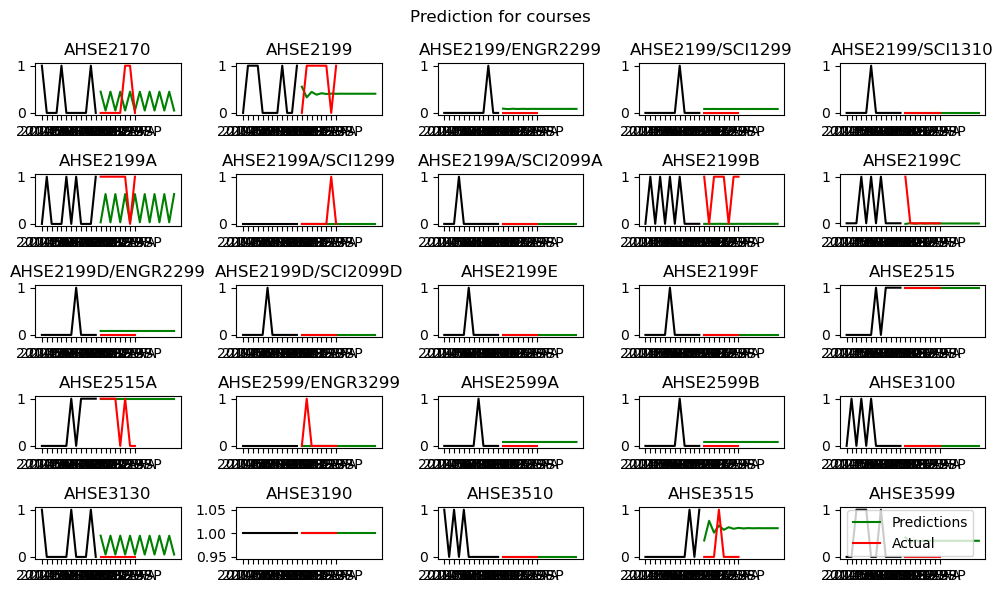

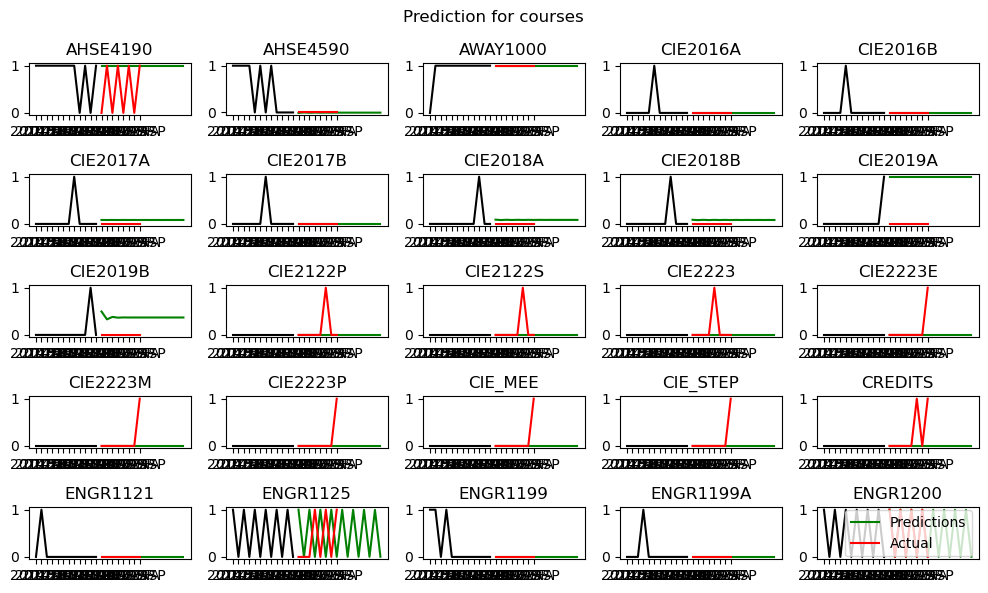

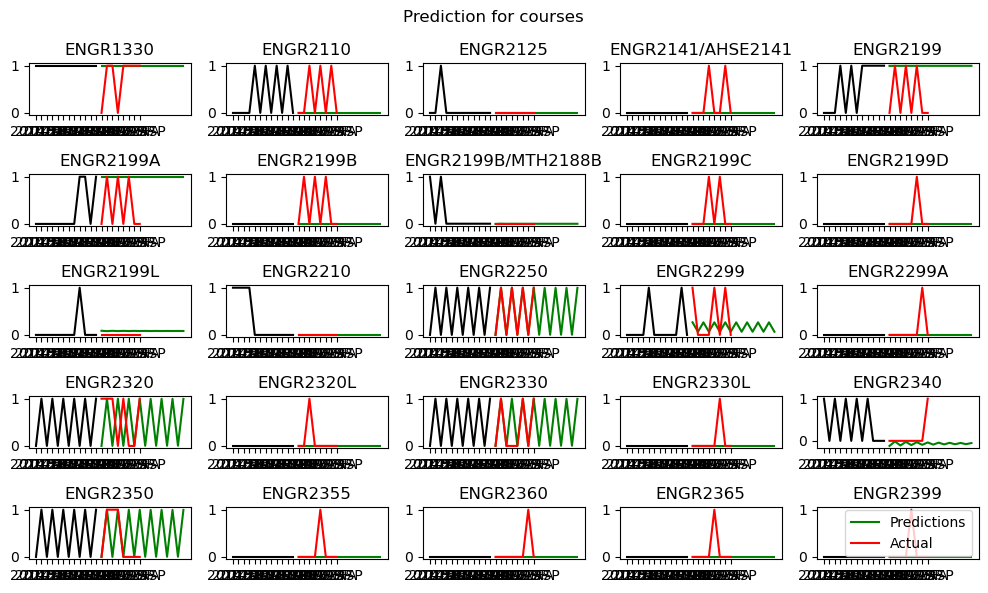

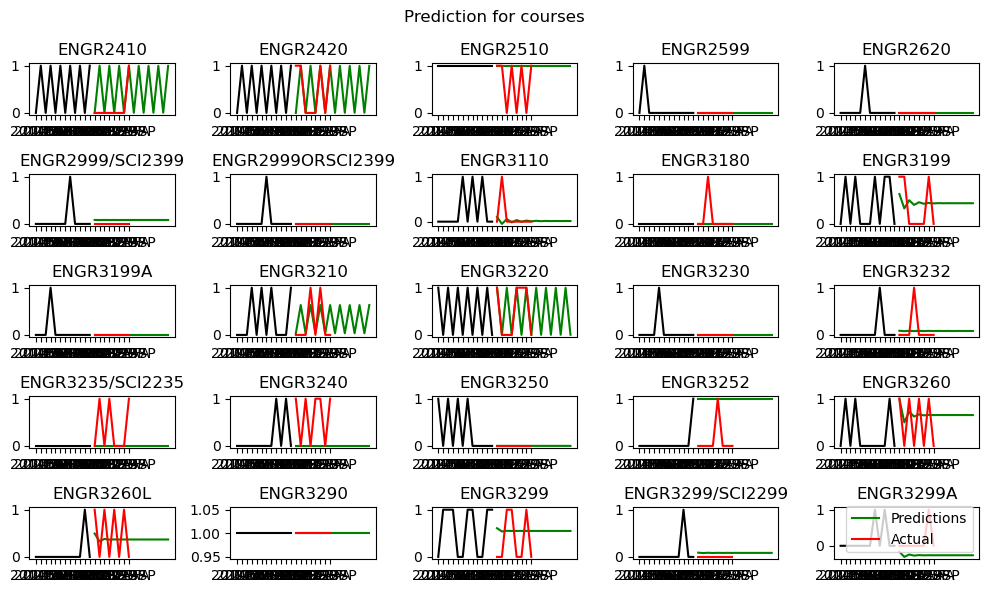

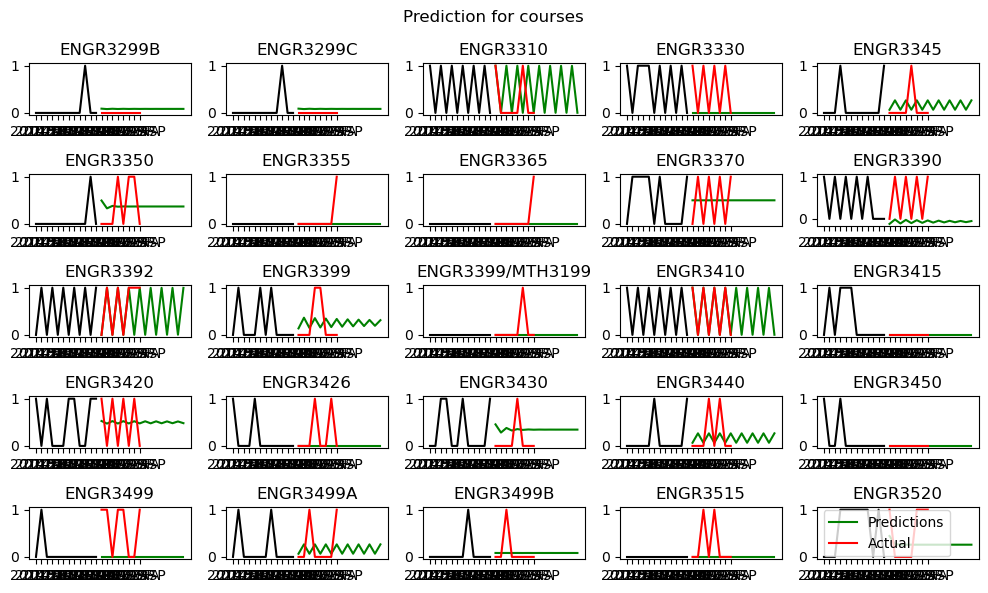

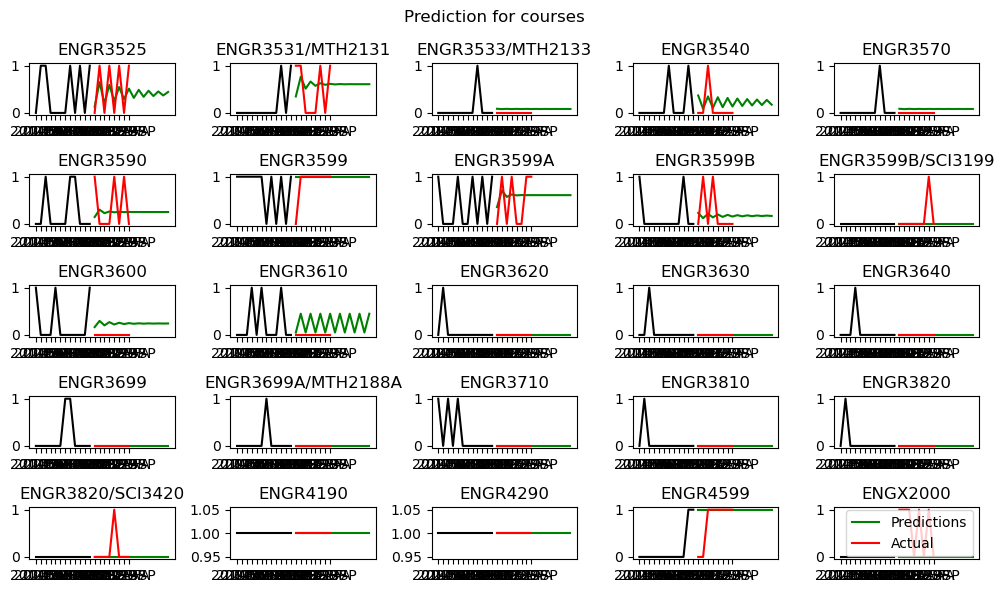

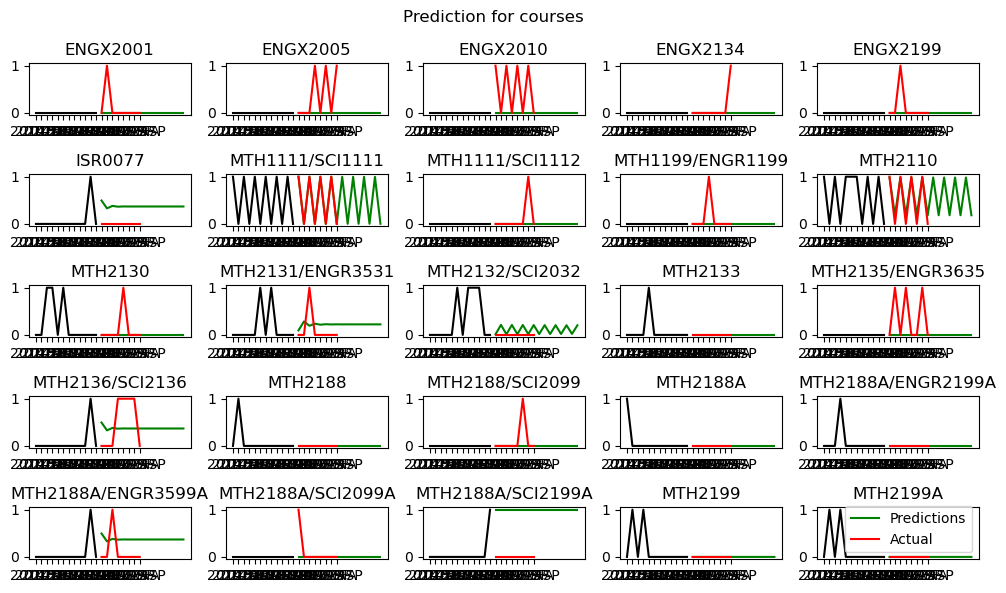

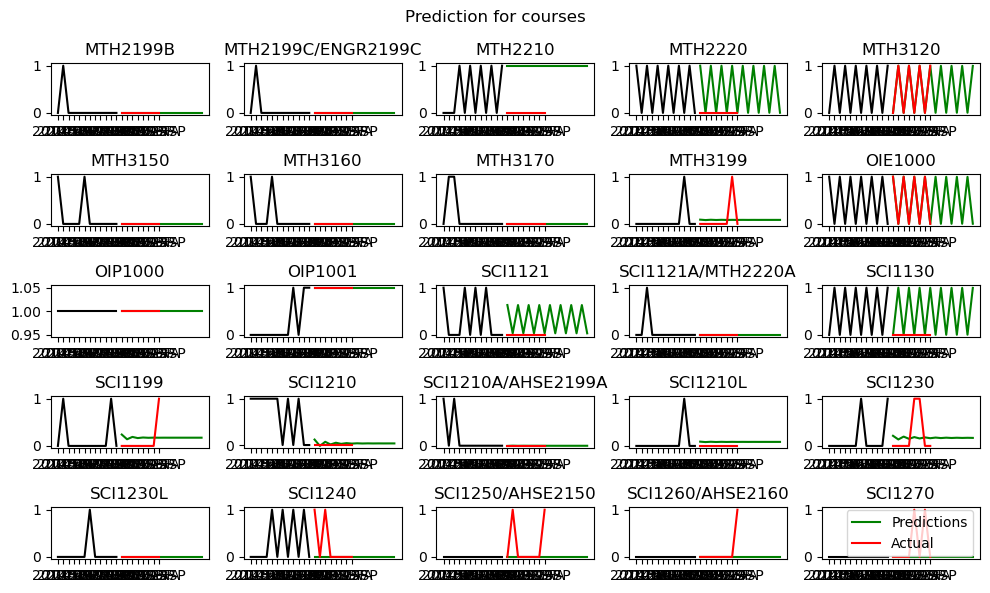

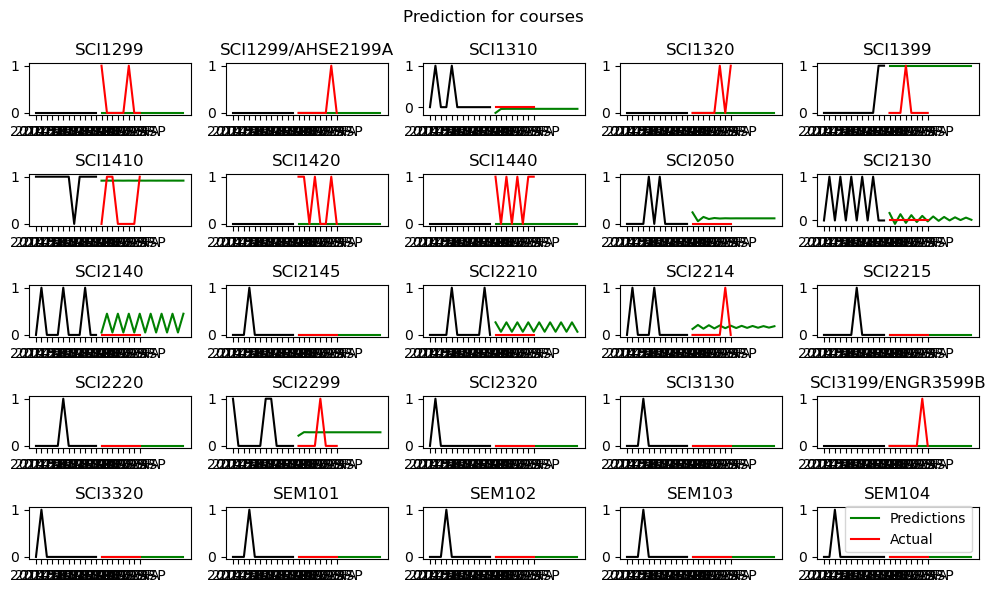

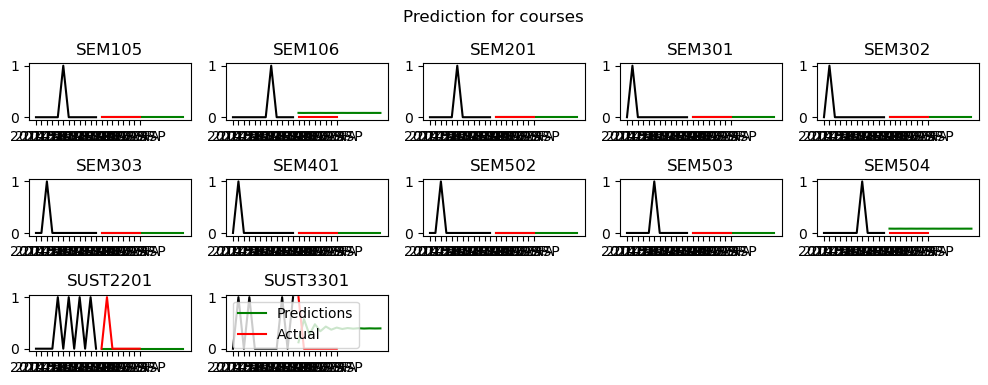

In [45]:
# Number of plots per figure
plots_per_figure = 25

# Calculate the number of figures needed
num_figures = len(prediction) // plots_per_figure + 1

# Loop through each figure
for fig_num in range(num_figures):
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Loop through each plot within the figure
    for i, (pcn, ypo) in enumerate(prediction.items()):
        # Skip plots that don't belong to the current figure
        if i // plots_per_figure != fig_num:
            continue
        
        # Plot the data
        plt.subplot(plots_per_figure // 5, 5, i % plots_per_figure + 1)
        y = train.T[pcn]
        plt.plot(y, color='black', label='train')
        plt.plot(ypo, color='green', label='Predictions')
        plt.plot(test.T[pcn], color='red', label='Actual')
        plt.title(pcn)
    
    # Adjust layout and show legend
    plt.suptitle('Prediction for courses')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Train for all 10 years

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

prediction = {}
for prediction_course_number in course_offering.index:
       y = course_offering.T[prediction_course_number]
       # define model
       ARMAmodel = SARIMAX(y, order = (1,1,2))
       # fit model
       ARMAmodel = ARMAmodel.fit()
       prediction_semesters = ['2024FA', '2024SP', '2025FA', '2025SP', 
                               '2026FA', '2026SP', '2027FA', '2027SP',]
       prediction_semesters = pd.DataFrame(prediction_semesters)
       print(prediction_semesters.index)
       # generate predictions
       y_pred = ARMAmodel.get_forecast(16)
       y_pred_df = y_pred.conf_int(alpha = 0.05) 
       y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
       y_pred_df.index = range(12, 28)
       y_pred_out = y_pred_df["Predictions"] 

       prediction[prediction_course_number] = y_pred_out

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  1.50788D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     71      2     0     0   3.430D+03  -1.018D+01
  F =  -10.175735742155677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at th

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83923D-01    |proj g|=  2.14399D+00

At iterate    5    f=  2.15908D-01    |proj g|=  5.00925D-02

At iterate   10    f=  2.08739D-01    |proj g|=  2.16255D-02

At iterate   15    f=  2.00769D-01    |proj g|=  2.45172D-01

At iterate   20    f=  1.90837D-01    |proj g|=  2.48934D-02

At iterate   25    f=  1.89776D-01    |proj g|=  3.90553D-03

At iterate   30    f=  1.89701D-01    |proj g|=  1.01070D-02

At iterate   35    f=  1.89693D-01    |proj g|=  1.13850D-03

At iterate   40    f=  1.89693D-01    |proj g|=  9.42013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     58      1     0     0   1.589D-04   6.208D-01
  F =  0.62079590682292229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64714D-01    |proj g|=  3.13326D-01

At iterate    5    f=  4.68135D-03    |proj g|=  6.01590D-02

At iterate   10    f= -6.27263D-04    |proj g|=  1.46047D-02

At iterate   15    f= -6.57866D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     69      2     0     0   1.798D-05   2.935D-01
  F =  0.29348202614668678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50532D-01    |proj g|=  5.69849D-01

At iterate    5    f=  4.47782D-01    |proj g|=  2.19326D-01

At iterate   10    f=  4.33880D-01    |proj g|=  2.10216D-02

At iterate   15    f=  4.12103D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+08    |proj g|=  2.74820D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     17      1     0     0   5.363D+04   3.272D+02
  F =   327.19912151948984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at th


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/b


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     17      1     0     0   5.363D+04   3.272D+02
  F =   327.19912151948984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+08    |proj g|=  2.74820D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/b


At iterate   25    f= -8.69835D-05    |proj g|=  4.09972D-03

At iterate   30    f= -8.74046D-05    |proj g|=  5.12127D-04

At iterate   35    f= -8.76038D-05    |proj g|=  2.70585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     61      1     0     0   4.231D-05  -8.760D-05
  F =  -8.7604665257789987E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17844D+0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99332D+00    |proj g|=  1.40033D+01

At iterate    5    f=  4.32685D-01    |proj g|=  4.99187D-02

At iterate   10    f=  4.29844D-01    |proj g|=  5.75113D-03

At iterate   15    f=  4.29357D-01    |proj g|=  7.80859D-02

At iterate   20    f=  4.28678D-01    |proj g|=  1.70875D-03

At iterate   25    f=  4.28653D-01    |proj g|=  4.28145D-03

At iterate   30    f=  4.28617D-01    |proj g|=  7.02586D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   35    f= -8.76038D-05    |proj g|=  2.70585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     61      1     0     0   4.231D-05  -8.760D-05
  F =  -8.7604665257789987E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56757D+00    |proj g|=  5.00580D+01
  ys=-3.762E-01  -gs= 1.083E+00 BFGS update SKIPPED

At iterate    5    f=  1.49598D-02    |proj

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     97      2     0     0   5.363D-05  -8.705D-05
  F =  -8.7045927048884359E-005

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79477D-02    |proj g|=  1.34091D+00

At iterate    5    f=  1.40908D-02    |proj g|=  1.64441D-01

At iterate   10    f=  1.85546D-03    |proj g|=  1.09961D-01

At iterate   15    f=  2.90970D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To en

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69427D-02    |proj g|=  1.32669D+00

At iterate    5    f= -1.42394D-02    |proj g|=  1.12914D-01

At iterate   10    f= -1.51743D-02    |proj g|=  2.13337D-03

At iterate   15    f= -1.52041D-02    |proj g|=  3.04563D-02

At iterate   20    f= -1.52427D-02    |proj g|=  3.49140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   1.701D-05  -1.524D-02
  F =  -1.5242669006485554E-002

CONVERG

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10532D-01    |proj g|=  4.95540D-01

At iterate    5    f=  2.93705D-01    |proj g|=  2.10721D-01

At iterate   10    f=  2.42860D-01    |proj g|=  5.84272D-02

At iterate   15    f=  2.42755D-01    |proj g|=  2.18617D-02

At iterate   20    f=  2.42539D-01    |proj g|=  1.55784D-02

At iterate   25    f=  2.42531D-01    |proj g|=  4.82532D-04

At iterate   30    f=  2.42526D-01    |proj g|=  8.05208D-03

At iterate   35    f=  2.42513D-01    |proj g|=  5.67587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate    5    f=  2.68128D-03    |proj g|=  1.27096D-01

At iterate   10    f= -1.41695D-02    |proj g|=  1.31131D-02

At iterate   15    f= -1.52378D-02    |proj g|=  2.31963D-03

At iterate   20    f= -1.52427D-02    |proj g|=  1.94778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     83      2     0     0   1.948D-05  -1.524D-02
  F =  -1.5242689761106255E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variable

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45326D-02    |proj g|=  1.32669D+00

At iterate    5    f= -2.58481D-02    |proj g|=  8.14086D-02

At iterate   10    f= -2.64152D-02    |proj g|=  2.68851D-02

At iterate   15    f= -2.66076D-02    |proj g|=  1.74022D-03

At iterate   20    f= -2.66399D-02    |proj g|=  2.69502D-02

At iterate   25    f= -2.68555D-02    |proj g|=  8.74831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4

 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and w

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08351D-01    |proj g|=  2.70237D-01

At iterate    5    f=  3.50485D-01    |proj g|=  6.99227D-02

At iterate   10    f=  3.37139D-01    |proj g|=  3.20780D-03

At iterate   15    f=  3.37121D-01    |proj g|=  2.60259D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   2.519D-05   3.371D-01
  F =  0.33712125279989086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeInd

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

  ys=-5.487E-07  -gs= 1.064E-06 BFGS update SKIPPED

At iterate   35    f=  4.15738D-01    |proj g|=  2.77556D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     56      1     1     0   4.310D-05   4.157D-01
  F =  0.41573806291496485     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38399D+00    |proj g|=  7.79353D+00

At iterate    5    f=  1.23560D-01    |proj

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     39      1     0     0   1.485D-04  -9.892D-05
  F =  -9.8924366449537615E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86749D-01    |proj g|=  3.19343D-01

At iterate    5    f=  7.54519D-01    |proj g|=  2.57276D-02

At iterate   10    f=  7.44938D-01    |proj g|=  2.80353D-02

At iterate   15    f=  7.44341D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   30    f=  2.81467D-01    |proj g|=  9.28900D-04

At iterate   35    f=  2.81438D-01    |proj g|=  5.53392D-03

At iterate   40    f=  2.81437D-01    |proj g|=  4.15825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     69      1     0     0   1.242D-03   2.814D-01
  F =  0.28143734929827563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90019D+0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  1.50788D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     71      2     0     0   3.430D+03  -1.018D+01
  F =  -10.175735742155677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at th


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     67      1     0     0   4.549D-04  -8.730D-05
  F =  -8.7302899890301380E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79477D-02    |proj g|=  1.34091D+00

At iterate    5    f=  1.40927D-02    |proj g|=  1.64531D-01

At iterate   10    f=  1.91283D-03    |proj g|=  1.11012D-01

At iterate   15    f=  3.22899D-0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/b

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.99135D-03    |proj g|=  1.32668D+00

At iterate    5    f= -5.06169D-02    |proj g|=  2.41780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      8      1     0     0   2.418D-07  -5.062D-02
  F =  -5.0616908109575309E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4    

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate    5    f= -3.91812D-01    |proj g|=  1.11200D+00

At iterate   10    f= -2.17297D+00    |proj g|=  6.08648D+00

At iterate   15    f= -3.59497D+00    |proj g|=  1.65025D+01

At iterate   20    f= -4.01441D+00    |proj g|=  4.00752D+01
  ys=-1.932E-09  -gs= 3.943E-07 BFGS update SKIPPED

At iterate   25    f= -4.01537D+00    |proj g|=  1.97968D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26    163      3     2     0   1.980D+00  -4.015D+00
  F =  -4.0153653997656606     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85356D+00    |proj g|=  1.05015D+01

At iterate    5    f=  5.69665D-01    |proj g|=  2.67118D-01

At iterate   10    f=  5.32524D-01    |proj g|=  8.20863D-02

At iterate   15    f=  5.14948D-01    |proj g|=  1.45588D-02

At iterate   20    f=  5.11597D-01    |proj g|=  1.58855D-02

At iterate   25    f=  5.10807D-01    |proj g|=  6.26432D-04

At iterate   30    f=  5.10662D-01    |proj g|=  1.34680D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   20    f=  5.02088D-01    |proj g|=  4.68294D-03

At iterate   25    f=  5.02004D-01    |proj g|=  2.42540D-03

At iterate   30    f=  5.01837D-01    |proj g|=  9.50560D-05

At iterate   35    f=  5.01837D-01    |proj g|=  3.21511D-05

At iterate   40    f=  5.01836D-01    |proj g|=  3.85760D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     66      1     0     0   3.858D-05   5.018D-01
  F =  0.50183622763022318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/b


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     66      2     0     0   8.070D-05  -8.614D-05
  F =  -8.6135710589896333E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51223D-01    |proj g|=  9.37012D-01

At iterate    5    f=  7.30619D-01    |proj g|=  2.68872D-01

At iterate   10    f=  6.78499D-01    |proj g|=  4.01033D-02

At iterate   15    f=  6.68503D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  2.97497D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.975D+13  -9.535D+00
  F =  -9.5345882385890004     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at th

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


At iterate   15    f= -6.57866D-04    |proj g|=  5.29499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   4.952D-05  -6.579D-04
  F =  -6.5787542047917040E-004

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  1.50788D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluatio

 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and w

RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93399D+00    |proj g|=  1.14416D+01

At iterate    5    f=  1.36982D-01    |proj g|=  1.38558D-01

At iterate   10    f=  1.55379D-02    |proj g|=  4.11303D-02

At iterate   15    f=  1.39037D-02    |proj g|=  9.50012D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     27      1     0     0   1.493D-05   1.390D-02
  F =   1.3903706875037381E-002

CONVERGENCE: REL_REDUCTION_OF_F_<


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a m

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45326D-02    |proj g|=  1.32669D+00

At iterate    5    f= -2.58481D-02    |proj g|=  8.14086D-02

At iterate   10    f= -2.64152D-02    |proj g|=  2.68851D-02

At iterate   15    f= -2.66076D-02    |proj g|=  1.74022D-03

At iterate   20    f= -2.66399D-02    |proj g|=  2.69502D-02

At iterate   25    f= -2.68555D-02    |proj g|=  8.74831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   20    f=  2.91545D-01    |proj g|=  1.37818D-03

At iterate   25    f=  2.91468D-01    |proj g|=  1.25002D-03

At iterate   30    f=  2.91451D-01    |proj g|=  2.66774D-03

At iterate   35    f=  2.91450D-01    |proj g|=  7.84579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     50      1     0     0   3.958D-04   2.914D-01
  F =  0.29144914643161318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variable

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

  ys=-2.802E+00  -gs= 8.367E-01 BFGS update SKIPPED

At iterate    5    f=  7.71012D-02    |proj g|=  4.74938D-01

At iterate   10    f=  1.61885D-02    |proj g|=  4.82959D-01

At iterate   15    f=  5.28643D-04    |proj g|=  2.99418D-03

At iterate   20    f=  5.19670D-04    |proj g|=  6.58499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     83      2     1     0   1.440D-05   5.197D-04
  F =   5.1967003521040671E-004

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   25    f=  2.89876D-01    |proj g|=  8.17556D-03

At iterate   30    f=  2.89811D-01    |proj g|=  7.75370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     60      1     0     0   7.765D-04   2.898D-01
  F =  0.28980937928138328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25000D+09    |proj g|=  1.85800D+14
  ys=-5.176E+00  -gs= 9.883E-01 BF

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   35    f=  2.65739D-02    |proj g|=  1.25348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     65      1     0     0   4.003D-05   2.657D-02
  F =   2.6573895082037401E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75695D-01    |proj g|=  6.51269D+00

At iterate    5    f=  4.44597D-01    |proj g|=  1.54557D-01

At iterate   10    f=  4.14765D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate    5    f=  1.40927D-02    |proj g|=  1.64531D-01

At iterate   10    f=  1.91283D-03    |proj g|=  1.11012D-01

At iterate   15    f=  3.22899D-05    |proj g|=  5.49469D-03

At iterate   20    f= -6.71761D-05    |proj g|=  1.62475D-02

At iterate   25    f= -8.16551D-05    |proj g|=  1.99889D-03

At iterate   30    f= -8.24099D-05    |proj g|=  4.75479D-03

At iterate   35    f= -8.64429D-05    |proj g|=  3.15102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     67      1     0     0   4.549D-04  -8.730D-05
  F =  -8.7302899890301380E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   20    f=  2.71216D-01    |proj g|=  1.68083D-02

At iterate   25    f=  2.70978D-01    |proj g|=  8.09263D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     49      1     0     0   2.305D-03   2.710D-01
  F =  0.27097399410029915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45326D-02    |proj g|=  1.32669D+00

At iterate    5    f= -2.58481D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   15    f=  5.25828D-01    |proj g|=  7.09810D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   7.098D-06   5.258D-01
  F =  0.52582772334141681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38500D-01    |proj g|=  9.60524D-01

At iterate    5    f=  2.79703D-01    |proj g|=  2.92599D-02

At iterate   10    f=  2.67613D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60129D-01    |proj g|=  1.57412D+00

At iterate    5    f=  4.75910D-01    |proj g|=  6.25419D-02

At iterate   10    f=  4.58533D-01    |proj g|=  9.34675D-02

At iterate   15    f=  4.51039D-01    |proj g|=  2.26537D-03

At iterate   20    f=  4.51020D-01    |proj g|=  6.18931D-05

At iterate   25    f=  4.51012D-01    |proj g|=  1.89287D-03

At iterate   30    f=  4.51008D-01    |proj g|=  1.66578D-03

At iterate   35    f=  4.51007D-01    |proj g|=  7.82686D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas


At iterate   20    f= -2.66399D-02    |proj g|=  2.69502D-02

At iterate   25    f= -2.68555D-02    |proj g|=  8.74831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   2.537D-05  -2.686D-02
  F =  -2.6856318474283946E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  2.97497D+13

           * * *

Tit   = total n


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/b


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.975D+13  -9.535D+00
  F =  -9.5345882385890004     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  2.97497D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

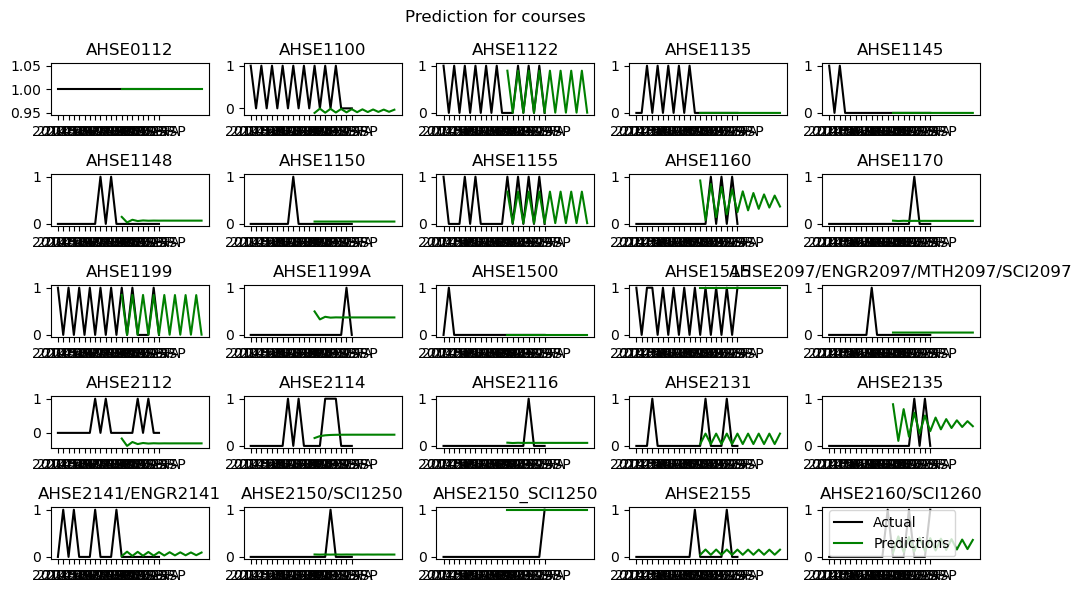

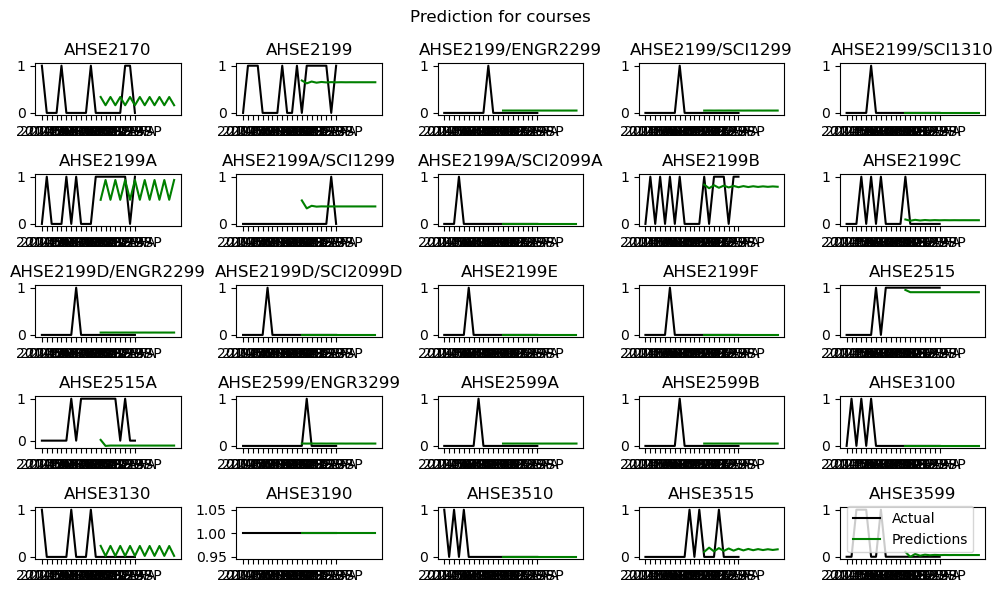

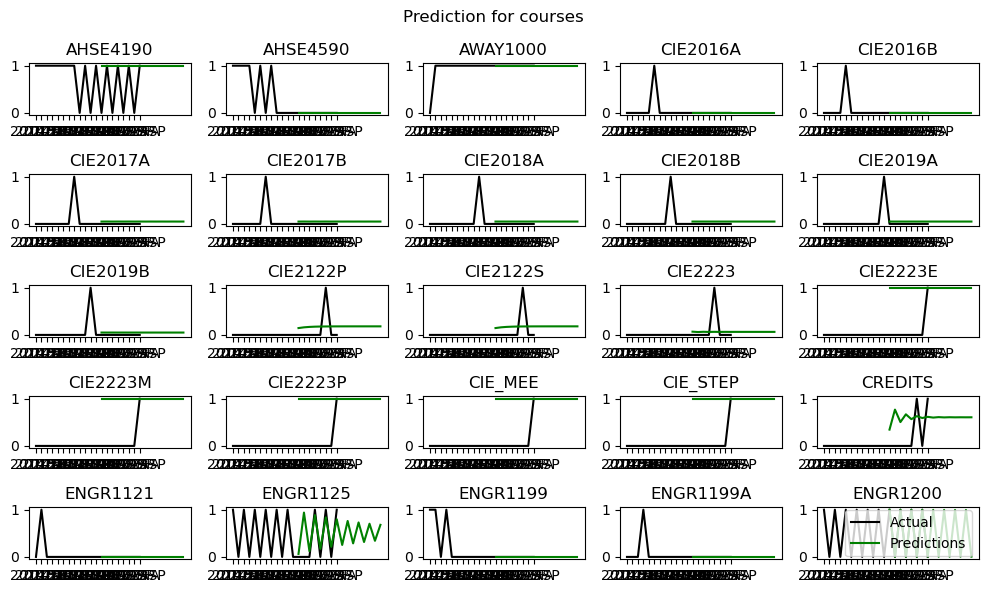

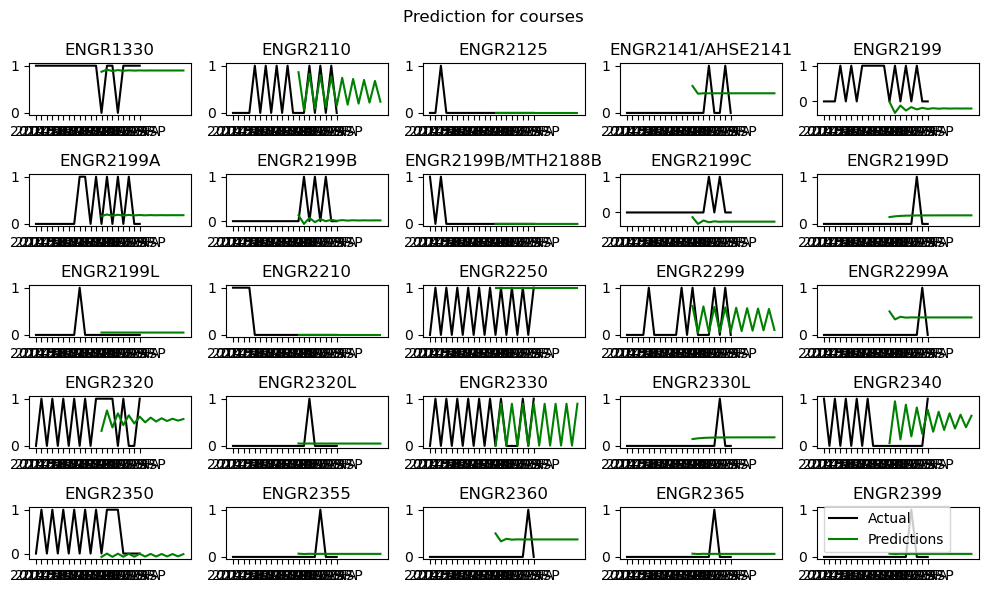

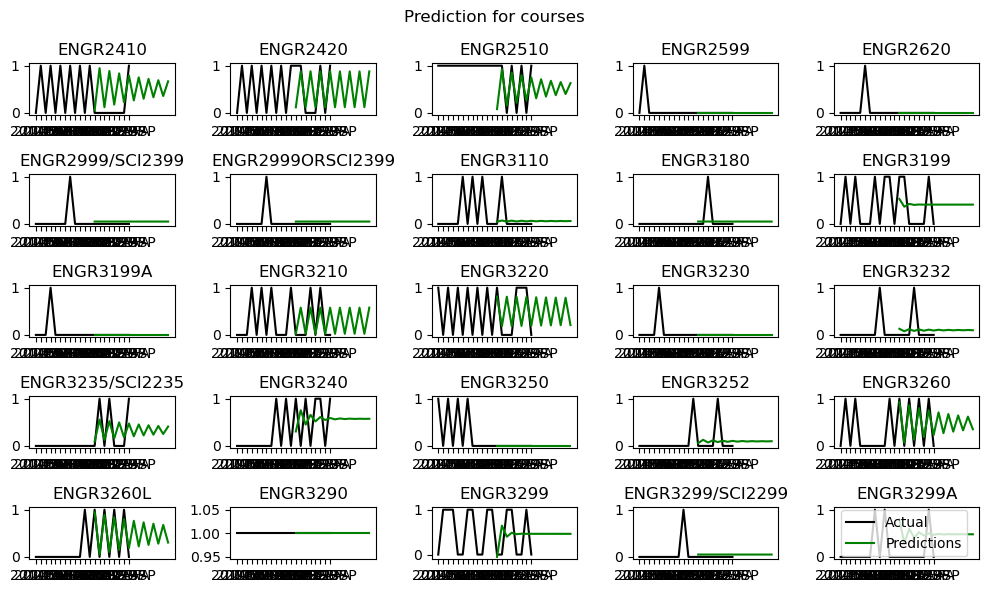

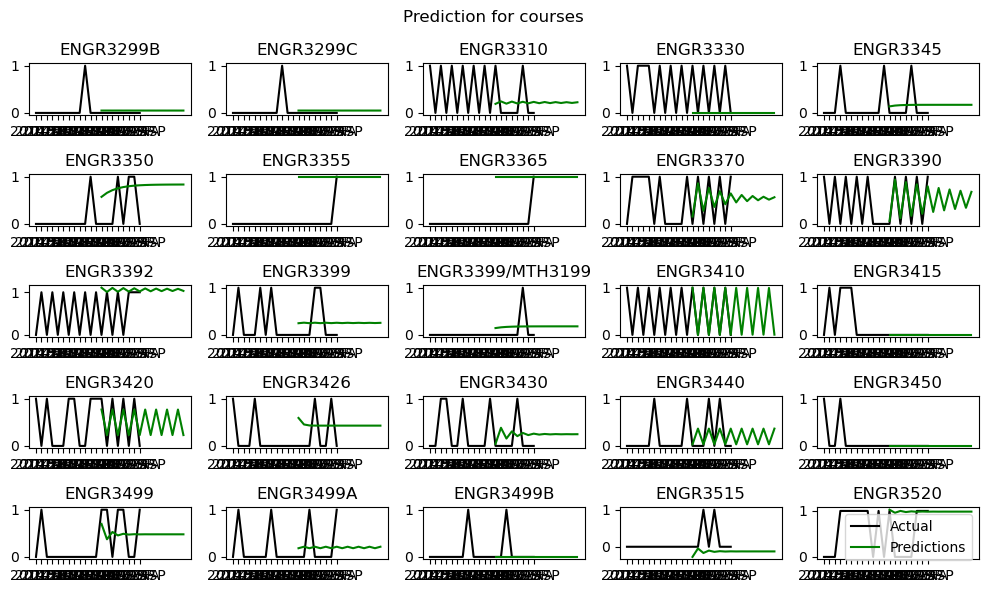

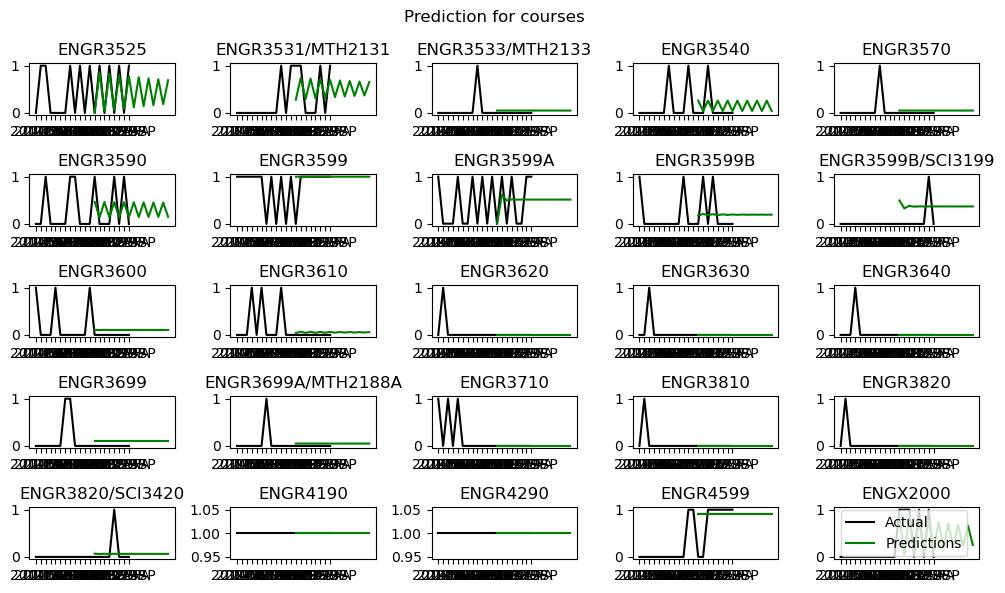

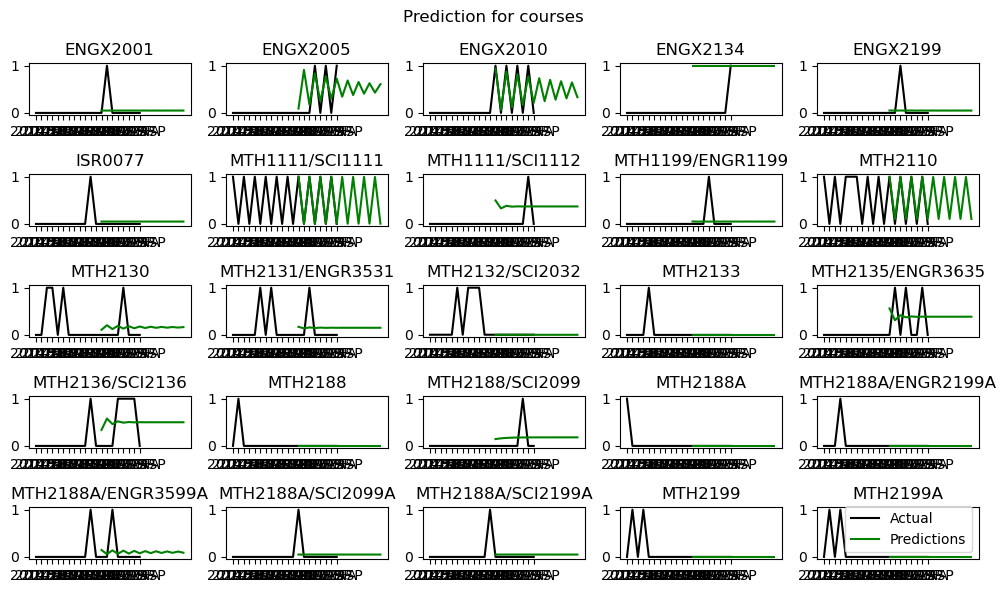

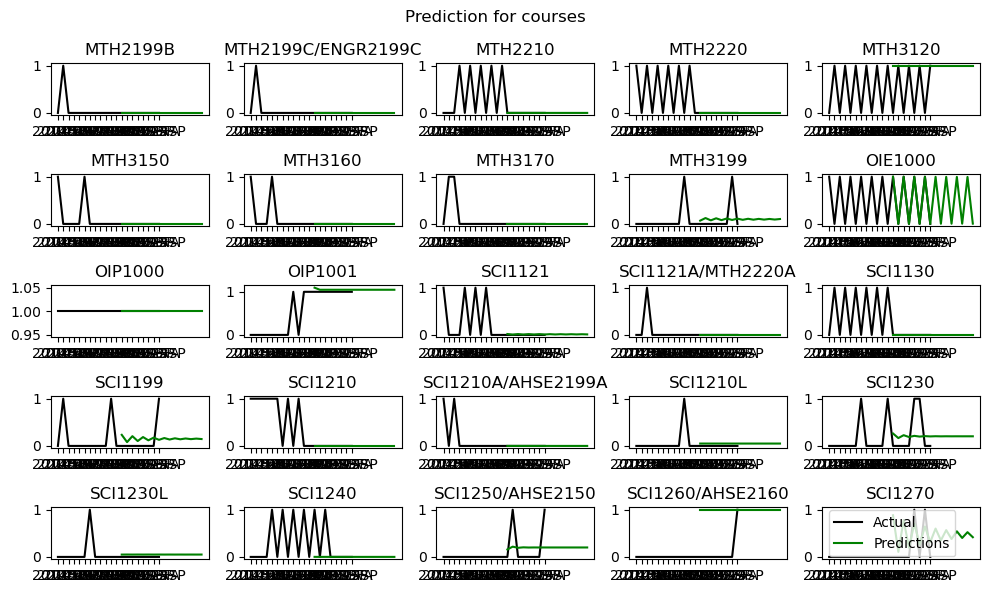

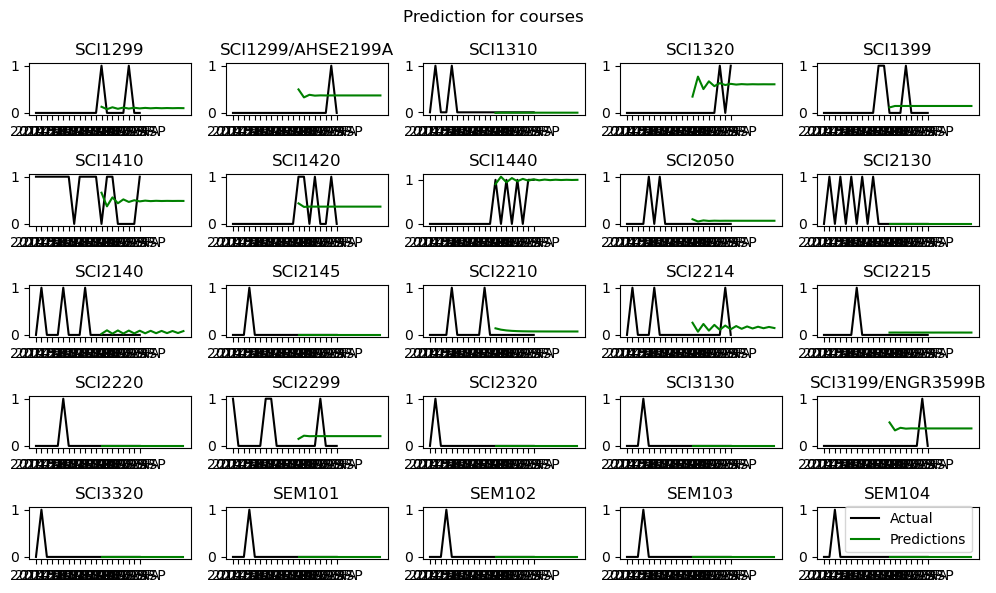

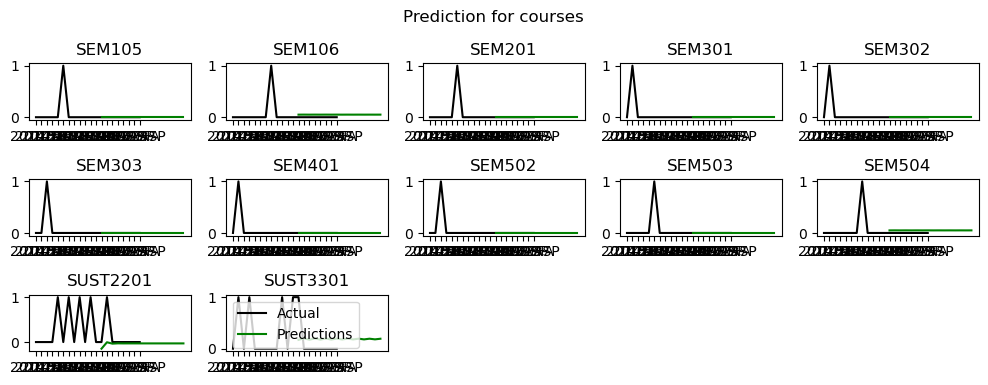

In [51]:
# Number of plots per figure
plots_per_figure = 25

# Calculate the number of figures needed
num_figures = len(prediction) // plots_per_figure + 1

# Loop through each figure
for fig_num in range(num_figures):
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Loop through each plot within the figure
    for i, (pcn, ypo) in enumerate(prediction.items()):
        # Skip plots that don't belong to the current figure
        if i // plots_per_figure != fig_num:
            continue
        
        # Plot the data
        plt.subplot(plots_per_figure // 5, 5, i % plots_per_figure + 1)
        y = course_offering.T[pcn]
        plt.plot(y, color='black', label='Actual')
        plt.plot(ypo, color='green', label='Predictions')
        plt.title(pcn)
    
    # Adjust layout and show legend
    plt.suptitle('Prediction for courses')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [56]:
prediction['ENGX2010']

12    0.934420
13    0.063454
14    0.873196
15    0.120375
16    0.820276
17    0.169575
18    0.774535
19    0.212100
20    0.734999
21    0.248858
22    0.700825
23    0.280629
24    0.671288
25    0.308090
26    0.645757
27    0.331826
Name: Predictions, dtype: float64